In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn')

# Data Exploration 

In [2]:
df = pd.read_csv("../Data/online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    5918
REGENCY CAKESTAND 3 TIER              4412
JUMBO BAG RED RETROSPOT               3469
ASSORTED COLOUR BIRD ORNAMENT         2958
PARTY BUNTING                         2765
                                      ... 
reverse mistake                          1
HEART MEASURING SPOONS SMALL             1
invoice 506647                           1
ACRYLIC BEAD CHAIN, BLUE                 1
MUG PINK AND PURPLE ARABIC DESIGN        1
Name: Description, Length: 5698, dtype: int64

In [4]:
df['Description'].nunique()

5698

In [5]:
df.drop('Description',1,inplace=True)

In [6]:
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df['TotalPrice'] = df['Quantity'] * df['Price']

In [8]:
list(df.columns)

['Invoice',
 'StockCode',
 'Quantity',
 'InvoiceDate',
 'Price',
 'Customer ID',
 'Country',
 'TotalPrice']

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df['Country'].value_counts()

United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169
Bahrain 

In [11]:
df.dtypes

Invoice                object
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
TotalPrice            float64
dtype: object

In [12]:
df['Customer ID'].fillna(0,inplace=True)

In [13]:
df.isnull().sum()

Invoice        0
StockCode      0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [14]:
df['Customer ID'] = df['Customer ID'].apply(lambda x: int(x))

# Sales Analysis by Product, Date, Country and Customer

In [15]:
data = df.copy()
data.sample(5)

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
688455,550527,84792,8,2011-04-19 10:48:00,4.65,12476,Germany,37.20
218185,510548,22533,1,2010-06-01 15:59:00,0.42,18038,United Kingdom,0.42
1007718,577438,22352,1,2011-11-20 11:09:00,2.55,18118,United Kingdom,2.55
861201,566291,21485,1,2011-09-11 15:31:00,4.95,12965,United Kingdom,4.95
549465,538307,22423,1,2010-12-10 13:27:00,12.75,14667,United Kingdom,12.75


## Product

In [16]:
product = data.groupby("StockCode").agg({"Quantity":"sum"}).sort_values("Quantity", ascending=False).reset_index()

<AxesSubplot:xlabel='StockCode', ylabel='Quantity'>

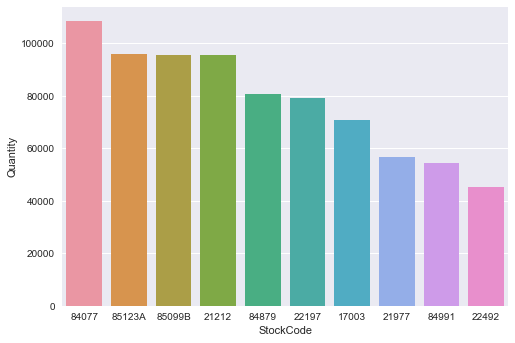

In [17]:
best_products = product.head(10)
sns.barplot(x='StockCode',y='Quantity',data=best_products)

<AxesSubplot:xlabel='StockCode', ylabel='Quantity'>

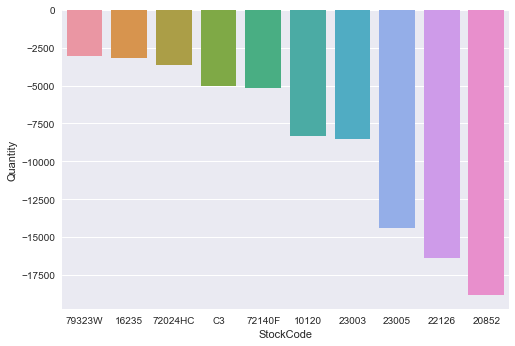

In [18]:
worst_products = product.tail(10)
sns.barplot(x='StockCode',y='Quantity',data=worst_products)

## Date

In [19]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate']).dt.strftime('%Y-%m')
sales = data.groupby("InvoiceDate").agg({"TotalPrice": "sum"}).sort_values("TotalPrice", ascending=False).reset_index()

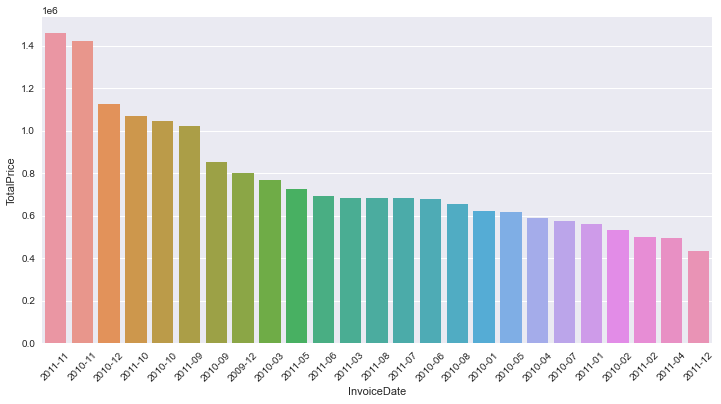

In [20]:
# sns.barplot(x=sales.InvoiceDate,y=sales.TotalPrice)

fig, ax = plt.subplots(figsize = (12,6))    
fig = sns.barplot(x = "InvoiceDate", y = "TotalPrice", data = sales, ax=ax)


ax.set_xticklabels(labels=sales.InvoiceDate.unique(), rotation=45)
plt.show()

#### Top 3 months in sales performance

In [21]:
sales.head(3)

,InvoiceDate,TotalPrice
0,2011-11,1461756.250
1,2010-11,1422654.642
2,2010-12,1126445.470


## Country

In [36]:
country = data.groupby("Country").agg({"TotalPrice":"sum"}).sort_values("TotalPrice", ascending=False).reset_index()

<AxesSubplot:xlabel='Country', ylabel='TotalPrice'>

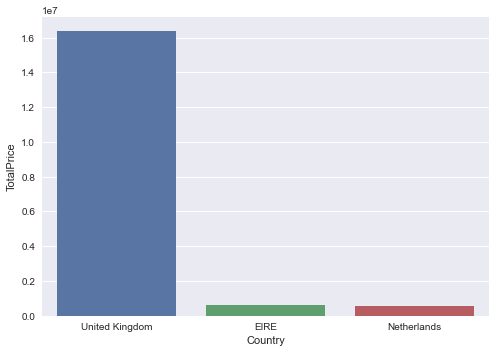

In [37]:
sns.barplot(x="Country",y="TotalPrice",data=country.head(3))

In [38]:
country['TotalPrice'] = country['TotalPrice'].apply(lambda x: "${:.1f}k".format((x/1000)))
country.head()

,Country,TotalPrice
0,United Kingdom,$16382.6k
1,EIRE,$615.5k
2,Netherlands,$548.5k
3,Germany,$418.0k
4,France,$328.2k


# Clustering and Segmentation by Sales

In [ ]:
X = df.sample(5000)

In [ ]:
X.head()

In [ ]:
ordinal_encoder = OrdinalEncoder()
countries = X['Country'].values.reshape(-1,1)
country_encoded = ordinal_encoder.fit_transform(countries)
X['Country'] = country_encoded

In [ ]:
stock = X['StockCode'].values.reshape(-1,1)
stock_encoded = ordinal_encoder.fit_transform(stock)
X['StockCode'] = stock_encoded

In [ ]:
invoice = X['Invoice'].values.reshape(-1,1)
invoice_encoded = ordinal_encoder.fit_transform(invoice)
X['Invoice'] = invoice_encoded

In [ ]:
X.head()

In [ ]:
def datetime_to_float(d):
    return d.timestamp()

X['InvoiceDate'] = X['InvoiceDate'].apply(datetime_to_float)

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [ ]:
y_pred is kmeans.labels_

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
kmeans.score(X)

In [ ]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
sns.pairplot(X.assign(hue=labels), hue='hue')

In [ ]:
X.columns.tolist()

In [ ]:
variables = [z for z in X.columns.tolist() if z != 'Customer ID']
sns.pairplot(X.assign(hue=labels), hue='hue', x_vars=variables, y_vars=["Customer ID"])

In [ ]:
ax = sns.scatterplot(X.iloc[:,3],X.iloc[:,5], hue=labels, alpha=0.5)
ax = sns.scatterplot(centroids[:, 3], centroids[:, 5],
                     hue=range(k), s=20, ec='black', legend=False, ax=ax)
plt.show()

# RFM Analysis

We fix the analysis date 14 days after the last transaction date to get resanable recency values.

In [39]:
today = df['InvoiceDate'].max() + pd.DateOffset(14)
rfm = df.groupby('Customer ID').agg({'InvoiceDate': lambda date: (today - date.max()).days,
                                     'Invoice': lambda num: num.nunique(),
                                     'TotalPrice': lambda TotalPrice: TotalPrice.sum()})
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
0,14,8752,2638958.18
12346,339,17,-64.68
12347,15,8,5633.32
12348,88,5,2019.40
12349,32,5,4404.54
